In [ ]:
pip install tensorflow


In [ ]:
!pip install tensorflow pillow


17225924/17225924 [==============================] - 0s 0us/step


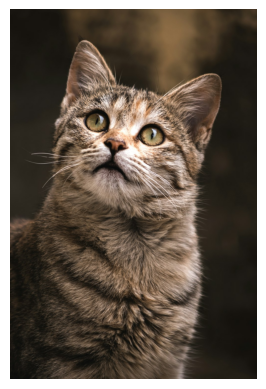

35363/35363 [==============================] - 0s 0us/step
Egyptian_cat: 48.12%
tabby: 25.63%
tiger_cat: 23.12%


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import requests
from PIL import Image
from io import BytesIO  # Import BytesIO class for handling image bytes
import matplotlib.pyplot as plt

# Load pre-trained MobileNet model
model = MobileNet(weights='imagenet')

def predict_image_from_url(image_url):
    # Download and load the image
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Preprocess the image
    img = img.resize((224, 224))  # Resize image to match MobileNet input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    processed_img = preprocess_input(img_array)

    # Make predictions
    predictions = model.predict(processed_img)
    decoded_predictions = decode_predictions(predictions, top=3)[0]

    # Print and return the top predictions
    for pred in decoded_predictions:
        print(f"{pred[1]}: {pred[2]*100:.2f}%")

    return img

# Example usage
image_url = 'https://images.unsplash.com/photo-1608848461950-0fe51dfc41cb?q=80&w=1000&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxleHBsb3JlLWZlZWR8MXx8fGVufDB8fHx8fA%3D%3D'
image = predict_image_from_url(image_url)
